In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

density = 1000

# Modified 22 March
def generate_gaussian():
    mu = np.random.uniform(low=5,high=200)
    variance = 20
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 25)
    y = stats.norm.pdf(x, mu, sigma) * np.random.uniform(low=1, high=8)
    y = y*500

    pref_x = np.array(range(density))
    new_y = np.interp(pref_x,x,y)
    
    new_y += np.random.uniform(low=0,high=20,size=(density,))

    return (pref_x,new_y)

# def generate_gaussian():
#     mu = np.random.uniform(low=5,high=30)
#     variance = 20
#     sigma = math.sqrt(variance)
#     x = np.linspace(mu - 3*sigma, mu + 3*sigma, 25)
#     y = stats.norm.pdf(x, mu, sigma) * np.random.uniform(low=1, high=8)


#     pref_x = np.array(range(density))
#     new_y = np.interp(pref_x,x,y)

#     new_y += np.random.uniform(low=0,high=0.1,size=(density,))

#     return (pref_x,new_y)



def f(x,a,tau):
    return a * np.exp(-x/tau)


def generate_decay_curve():
    a = np.random.uniform(low=0.1,high=1)
    tau = np.random.uniform(low=5,high=50)
    x = np.array(range(density))
    y = f(x,a,tau)

    return (y,a,tau)
    

def generate_dataset():
    (x,y) = generate_gaussian()
    (dec_y,a,t) = generate_decay_curve()
    z = np.convolve(y,dec_y)[:density]
    # z += np.random.uniform(0,0.2)
    z = z +  np.random.uniform(low=-z/6,high=z/6, size=density)


    input = np.concatenate((z,y))

    t = t/50
    output = (a,t)

    return (input,output)

In [21]:
def generate_dataset_two():
    (x,y) = generate_gaussian()
    
    (dec_y,a,t) = generate_decay_curve(amin=0.1,amax=1,taumin=0.1,taumax=15)
    (dec_y_2,a2,t2) = generate_decay_curve(amin=0.1,amax=1,taumin=15,taumax=100)

    new_dec = dec_y + dec_y_2

    t = t/15
    t2 = (t2 -  15)/85

    z = np.convolve(y,new_dec)[:density]
    z = z +  np.random.uniform(low=-z/6,high=z/6, size=density)

    input = np.concatenate((z,y))
    output = np.array([a,t,a2,t2,0,0])
    output = output.reshape(6)

    return (input,output)

In [22]:
""
x_list = []
y_list = []
for i in range(100000):
  
    (x,y) = generate_dataset()
  
    x_list.append(x)
    y_list.append(y)

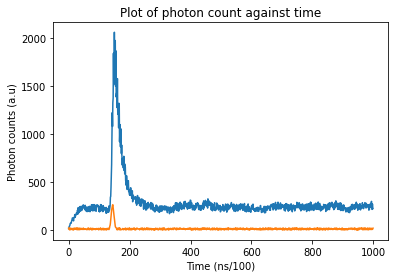

In [23]:
import matplotlib.pyplot as plt

x = np.array(range(density))
plt.plot(x,x_list[0][:density])
plt.plot(x,x_list[0][density:])
plt.xlabel("Time (ns/100)")
plt.ylabel("Photon counts (a.u)")
plt.title("Plot of photon count against time")
a = y_list[0][0]
tau = y_list[0][1]

# plt.plot(x,f(x,a,tau))
plt.show()

In [24]:
import tensorflow as tf

x_list = np.array(x_list)
y_list = np.array(y_list)

x_list = tf.keras.utils.normalize(x_list)

print(x_list.shape)
print(y_list.shape)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_list, y_list, test_size=0.10, random_state=40)




(100000, 2000)
(100000, 2)


In [25]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import tensorflow as tf


model = Sequential()
model.add(Dense(200, activation='relu', input_dim=density*2))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(Dense(2, activation='relu'))

In [27]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5), loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2)
# model.summary()

Epoch 1/50
563/563 [==============================] - 13s 20ms/step - loss: 0.0475 - accuracy: 0.5306 - val_loss: 0.0342 - val_accuracy: 0.6347
Epoch 2/50
563/563 [==============================] - 11s 20ms/step - loss: 0.0403 - accuracy: 0.6125 - val_loss: 0.0270 - val_accuracy: 0.7034
Epoch 3/50
563/563 [==============================] - 11s 19ms/step - loss: 0.0306 - accuracy: 0.7198 - val_loss: 0.0151 - val_accuracy: 0.8180
Epoch 4/50
563/563 [==============================] - 11s 20ms/step - loss: 0.0203 - accuracy: 0.8136 - val_loss: 0.0085 - val_accuracy: 0.8664
Epoch 5/50
563/563 [==============================] - 12s 21ms/step - loss: 0.0162 - accuracy: 0.8480 - val_loss: 0.0067 - val_accuracy: 0.8823
Epoch 6/50
563/563 [==============================] - 11s 19ms/step - loss: 0.0143 - accuracy: 0.8639 - val_loss: 0.0060 - val_accuracy: 0.8920
Epoch 7/50
563/563 [==============================] - 11s 20ms/step - loss: 0.0132 - accuracy: 0.8738 - val_loss: 0.0049 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 7.1347e-04 - accuracy: 0.9581


[0.0007134663756005466, 0.9581000208854675]

In [28]:
m_list = []
n_list = []
for i in range(50):
  (m,n) = generate_dataset()
  m_list.append(m)
  n_list.append(n)


m = np.array(m_list)
m = tf.keras.utils.normalize(m)
n = np.array(n_list)

print(n_list)

[(0.24069625747806514, 0.6376820669835902), (0.14433353498100848, 0.7272384213623461), (0.7444922816447397, 0.18142216678309417), (0.36071540671751345, 0.632291251580081), (0.5761026767714814, 0.8373174860845076), (0.3122775832199831, 0.9786142874837026), (0.8079185406895443, 0.6226910150858811), (0.12153131440855167, 0.17054415808892964), (0.9035629649134869, 0.5266259122730874), (0.26779090270265443, 0.9306388074391216), (0.181936492067084, 0.9742614663456272), (0.6509582955335441, 0.330895276096885), (0.5720791921941613, 0.5963613107304221), (0.7085326603145728, 0.9849035779582317), (0.4740436866073974, 0.7568388852790215), (0.865629743414992, 0.2165977356352574), (0.7511406295304917, 0.37423106347351576), (0.6164843174373841, 0.38710703692867354), (0.9129842358313047, 0.2493063492738179), (0.5162831712746717, 0.21146271968303185), (0.9265877175182595, 0.6841733975365457), (0.258362305845673, 0.6805701131167333), (0.8265337602331453, 0.22922312565636843), (0.5999191615900701, 0.4765

In [29]:

pred_n = model.predict(m)

In [30]:
pred_n = np.array(pred_n)

[[0.22868045 0.14372809 0.6972886  0.3418305  0.51766586 0.3302186
  0.7441886  0.12432164 0.8590264  0.2709443  0.18960956 0.6407435
  0.57912606 0.72015965 0.4310788  0.7998802  0.72513527 0.6328767
  0.90854996 0.4630925  0.88883114 0.25074464 0.8342652  0.5584787
  0.200699   0.5639576  0.5247777  0.3278117  0.39398122 0.8271011
  0.95929366 0.87792593 0.7869782  0.589541   0.37866065 0.4828785
  0.12206043 0.61517304 0.30002677 0.20422015 0.9429334  0.1432758
  0.5376808  0.6356328  0.13766776 0.6949057  0.4326442  0.38499925
  0.8439339  0.8212697 ]
 [0.6623153  0.7493213  0.20060545 0.6237983  0.8683118  0.9198995
  0.62554336 0.18230367 0.55718255 0.89456075 0.97990435 0.32466227
  0.54144776 0.9378994  0.8146811  0.23643407 0.36575103 0.3644539
  0.25633344 0.22981977 0.74179345 0.7004327  0.21627153 0.47193265
  0.49745786 0.936994   0.16043879 0.82768244 0.43025267 0.31316942
  0.39639187 0.94514626 0.924781   0.64425063 0.8176766  0.91087985
  0.2988665  0.52098906 0.790353

Text(0.5, 1.0, 'A graph of predicted lifetime against generated\n lifetime for a single exponential decay model with\n added noise to the impulse response function')

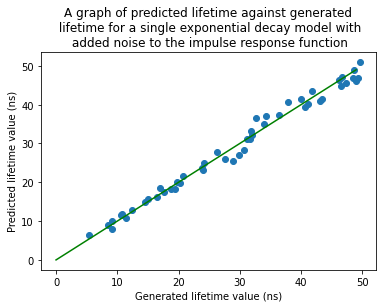

In [34]:
n_list_ = np.array(n_list).T
pred_n_ = pred_n.T


print(pred_n_)

n_list_ = n_list_[1] * 50
pred_n_ = pred_n_[1] * 50



x = np.array(range(50))

# print(np.std(pred_n_))



plt.scatter(n_list_,pred_n_)
plt.plot(x,x,c='g')
plt.xlabel("Generated lifetime value (ns)")
plt.ylabel("Predicted lifetime value (ns)")
plt.title("A graph of predicted lifetime against generated\n lifetime for a single exponential decay model with\n added noise to the impulse response function")
# plt.show()



[[0.38719958 0.2357766 ]]
(0.3952595729557512, 0.23665273259427122)


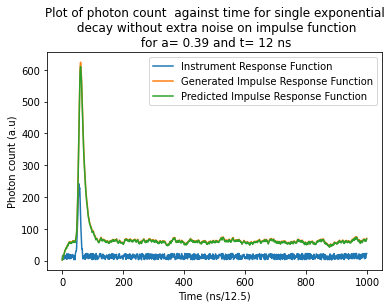

In [ ]:
(m,n) = generate_dataset()

m_ = tf.keras.utils.normalize(m)

m_ = np.array(m_)

pred_n = model.predict(m_)

print(pred_n)

x = np.array(range(1000))
a = float(pred_n[0][0])
tau = float(pred_n[0][1])*50
irf = m[density:]
y = np.convolve(irf,f(x,a,tau))[:density]

plt.plot(x,(irf),label="Instrument Response Function")
plt.plot(x,(m[:density]),label="Generated Impulse Response Function")
plt.plot(x,(y),label="Predicted Impulse Response Function")
plt.legend()
plt.xlabel("Time (ns/12.5)")
plt.ylabel("Photon count (a.u)")
plt.title("Plot of photon count  against time for single exponential\n decay without extra noise on impulse function\n for a= {} and t= {} ns".format(round(a,2),round(tau)))
print(n)

plt.show()

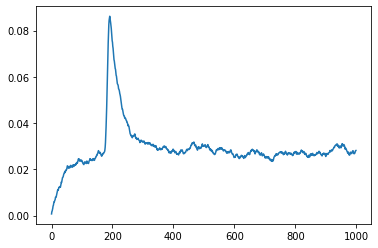

In [ ]:
|



y = np.convolve(irf,f(x,a,tau))[:density]

# print(y)

plt.plot(x,y)
plt.show()

In [19]:
n_ = np.absolute(pred_n-n)/ pred_n

N_ = 1 - n_

print(np.mean(pred_n,axis=0))
print(np.std(n,axis=0))
print(np.average(N_, axis=0))

[0.61107   0.5343446]
[0.26237409 0.26959139]
[0.9449883  0.93388101]


In [ ]:
model.save("mymodel")

INFO:tensorflow:Assets written to: mymodel/assets
